In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [476]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/respiratoryrate vs r-r values/3000-4000.csv")

In [477]:
df.head(1000)

,respiratoryrate,rrvalues
0,15.0462,0.748
1,15.0462,0.750
2,15.0468,0.726
3,15.1941,0.710
4,15.1941,0.719
...,...,...
995,14.0496,0.717
996,14.0496,0.695
997,14.4676,0.668
998,15.0363,0.664


In [478]:
df.describe()

,respiratoryrate,rrvalues
count,1000.000000,1000.000000
mean,13.320198,0.710353
std,2.179808,0.051583
min,7.868800,0.593000
25%,12.595300,0.674750
50%,13.575600,0.712000
75%,14.278475,0.740000
max,39.584300,1.387000


In [479]:
df.shape


(1000, 2)

In [480]:
cdf = df[['respiratoryrate','rrvalues']]
cdf.head(5)

,respiratoryrate,rrvalues
0,15.0462,0.748
1,15.0462,0.750
2,15.0468,0.726
3,15.1941,0.710
4,15.1941,0.719


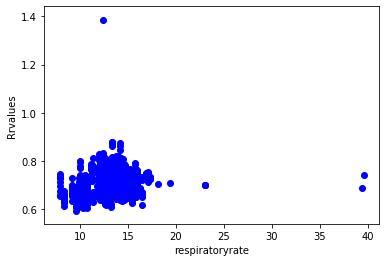

In [481]:
#graph of SNO vs r-r values

plt.scatter(cdf.respiratoryrate, cdf.rrvalues,color='blue')
plt.xlabel('respiratoryrate')
plt.ylabel('Rrvalues')
plt.show()

In [482]:
#splitting our data in 80-20 ratio for regression

In [483]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

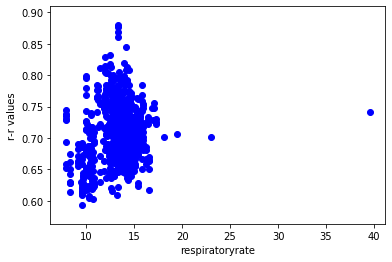

In [484]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")
plt.show()

In [485]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00432557]]
Intercept:  [0.65194205]


Text(0, 0.5, 'r-r values')

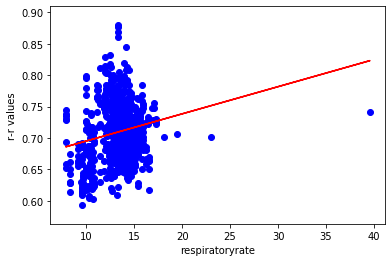

In [486]:
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")

In [487]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -33.52


In [488]:
#using polynomial regression

In [489]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.        ,  15.0462    , 226.38813444],
       [  1.        ,  15.0462    , 226.38813444],
       [  1.        ,  15.1941    , 230.86067481],
       ...,
       [  1.        ,  14.0496    , 197.39126016],
       [  1.        ,  14.4676    , 209.31144976],
       [  1.        ,  15.0363    , 226.09031769]])

In [490]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.01170581 -0.00023571]]
Intercept:  [0.59651832]


Text(0, 0.5, 'r-rvalues')

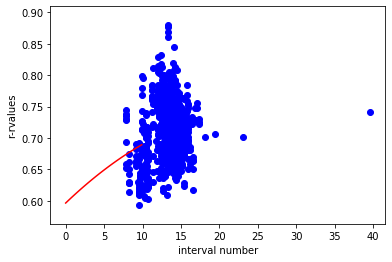

In [491]:
#plotting the polynomial regression
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [492]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -40.74
